# Cancer cell classification using Scikit-learn

## Algorithms used: K-Nearest Neighborhood, Gaussian Naive Bayes

For this Project we will be using Scikit-Learn and utilizing the Wisconsin Breast Cancer(Diagnostic) dataset. Since it is a database that is already available on scikit-learn we can import it directly from the Library.

In [81]:
#Import scikit-learn library and the dataset from the Scikit-Learn Library
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#To obtain Correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#To Obtain Linear CRegression model and Residuals
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#Import the Algorithms, and Corss Validation Method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

## Data Description

### Targets

***Malignant***

The cancer is harmful

***Benign***

The cancer is not harmful

***Number of Features***

There are a total of 30 features in the dataset

***Features List***

Load the required data set and organize the data into difference appropriately named variables, and observe the Number of data and features available.

In [43]:
data = load_breast_cancer()

#Organize our data into Target, Target Names, Features, and Feature Names
target_names = data['target_names']
targets = data['target']
features = data['data']
feature_names = data['feature_names']
#Convert the 'Bunch' Obejct to a Pandas Dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['targets'] = data.target

print(features.shape)
print(target_names)
print(feature_names)

(569, 30)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We have a decent number of observations to work with, and can select an Algorithm accordingly.

Upon examination of the organized data, we are able to see the targets and the features we are given to work with.

## Which Algorith should be use for the dataset?

## Checking if there is a linear relationship in the dataset.

***We can check if there is a linear relationship between the features and the target variables by the following methods:***

***1. Correlation matrix***

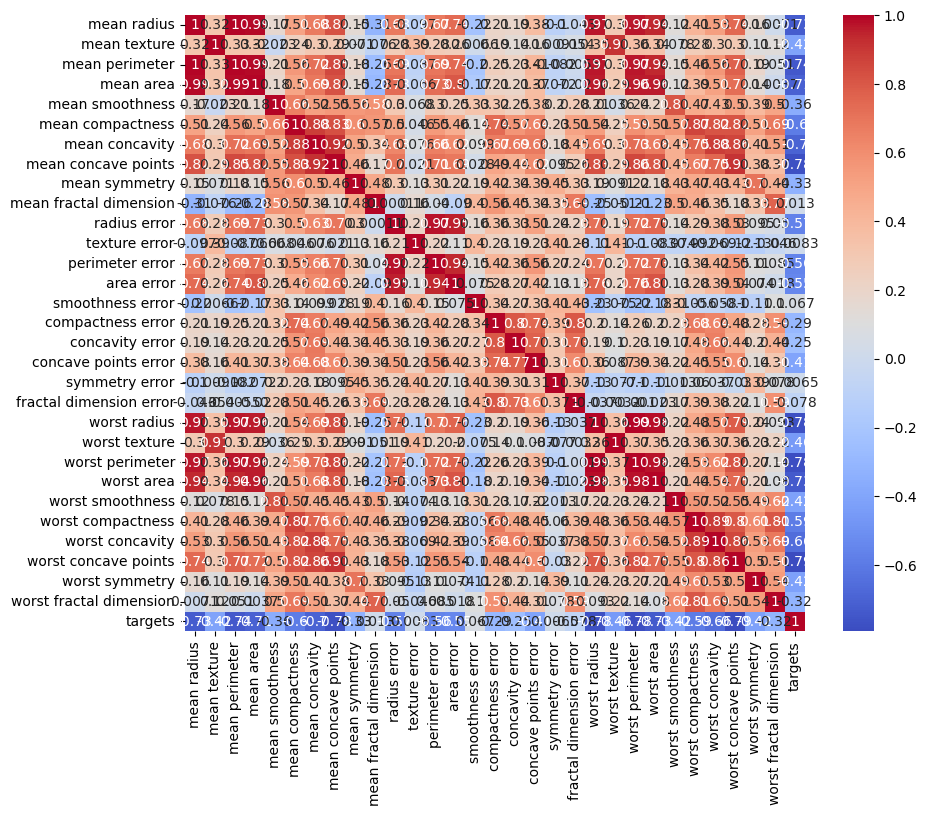

In [64]:


# Assume df is your DataFrame and 'target' is your target column
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

From the Correlation Matrix, we can observe that the correlation with the Target variable is always below 0. Thus, the targets and the features do not suggest a linear relationship.

***2. By using Linear Regression Model and analyzing Residuals***

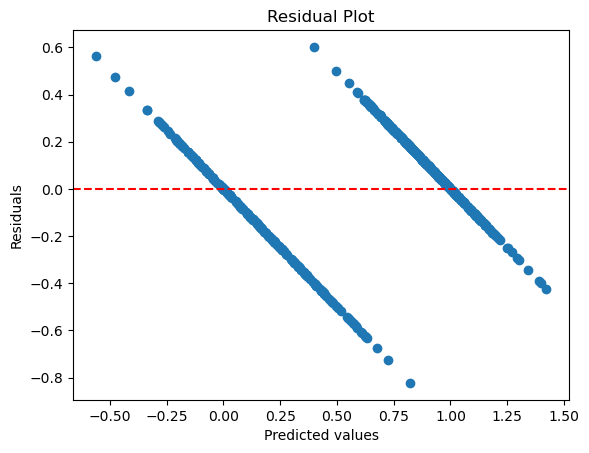

In [68]:
X = df.drop(columns='targets')  # Features
y = df['targets']  # Target

# Fit the model
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

# Plot residuals
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The Residual Plot shows two linear parallel lines, and not randomly scattered residuals as would be common for a linear relationship. Thus, the features and the targets do not have a linear relationship.

### Algorithms
Due to the non-linear relationship between the target variables and the features in the dataset, it would be advisable to use Machine Learning Classification Algorithms that would be most suitable for small and simple datasets having a non-linear relationship. A few algorithm that could be utilized in such situation are:

***K-Nearest Neighborhood Algorithm***

A non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

***Naive Bayes Algorithm***

An algorithm that learns the probability of every object, its features, and which groups they belong to.


Let us use KNN Algorithm and Naive Bayes Algorithm as classification algorithm. We can select one of the two based on which algorithm is able to provide higher accuracy.

In [83]:
knn = KNeighborsClassifier(n_neighbors = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=10)
accuracy_sum = 0
for train_index, test_index in kf.split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = targets[train_index], targets[test_index]

    knn.fit(features_train, target_train)
    predictions = knn.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    accuracy_sum = accuracy_sum + accuracy
print("Mean Accuracy for KNN:",accuracy_sum/5.0)

gnb = GaussianNB()
kf = KFold(n_splits=5, shuffle=True, random_state=10)
accuracy_sum = 0
for train_index, test_index in kf.split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = targets[train_index], targets[test_index]

    gnb.fit(features_train, target_train)
    predictions = gnb.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    accuracy_sum = accuracy_sum + accuracy
print("Mean Accuracy for GNB:",accuracy_sum/5.0)

Mean Accuracy for KNN: 0.9384722869119703
Mean Accuracy for GNB: 0.9384257102934328


So, we find out that this Machine Learning Classifier when based on K-Nearest Neighborhood algorithm gives an Accuracy of 93.847%, while the Classifier based on Gaussian Naive Bayes gives an Accuracy of 93.842%.